# 1.Підключення основних бібліотек, огляд та ознайомлення з даними

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv(r'BankChurners.csv')

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Перевіримо тип даних, кількість та наявність пропущених значень.
Велика кількість ознак клієнта мають не числові значення, пропущуних значень немає

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# 2. Первинний аналіз даних

Замінимо назви колонок на зручніші для роботи

In [6]:
df = df.rename(columns={'CLIENTNUM': 'phone', 'Customer_Age': 'age', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'naive_bayes_month_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'naive_bayes_month_2'})

In [7]:
df.head()

,phone,Attrition_Flag,age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,naive_bayes_month_1,naive_bayes_month_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Оглянемо основні статистичні показники по колонках.
Із основного потрібно відмітити, що середній вік клієнта банку - 46 років; середній час користування послугами банку - 36 місяців або 3 роки.

In [8]:
df.describe()

,phone,age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,naive_bayes_month_1,naive_bayes_month_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Так як основною нашого дослідження є виявлення особливостей, через які клієнти перестають користуватися послугами банками, то основною зміною для досліджень буде "Attrition_Flag". Перевіримо, чи збалансована ця вибірка

In [9]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

(array([0, 1]),
 [Text(0, 0, 'Existing Customer'), Text(1, 0, 'Attrited Customer')])

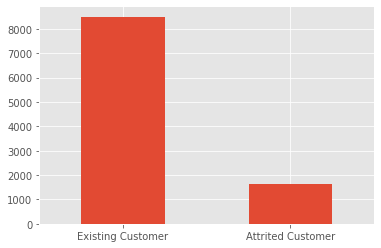

In [10]:
df["Attrition_Flag"].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)

Як бачимо, вибірка є незбалансованою

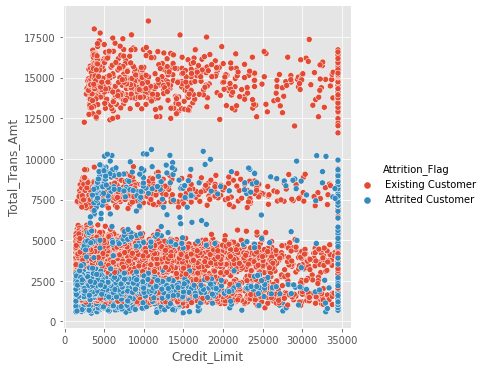

In [14]:
sns.relplot( x = 'Credit_Limit', y = 'Total_Trans_Amt', data = df, hue = 'Attrition_Flag' )

Клієнти, які припинили користуватися послугами банку рідше мали високий кредитний ліміт та не проводили більше 12500 тразакцій

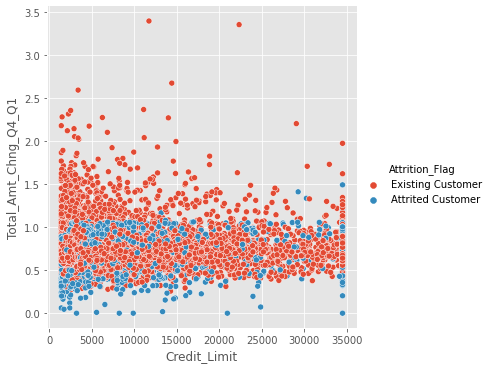

In [15]:
sns.relplot( x = 'Credit_Limit', y = 'Total_Amt_Chng_Q4_Q1', data = df, hue = 'Attrition_Flag' )


Серед клієнтів, які припинили користуватися карткою можна виділити два класи, які підтримували свої транзакції на сталому рівні(Можливо, користувалися банком для конкретної цілі, яка залишалася вінсно статичною в ціні. Наприклад, комунальних платежів). Та клієнтів, у яких суттєво зменшувалася кількість транзакцій.

Поглянемо на інші розподіли  та взаємні розподіли

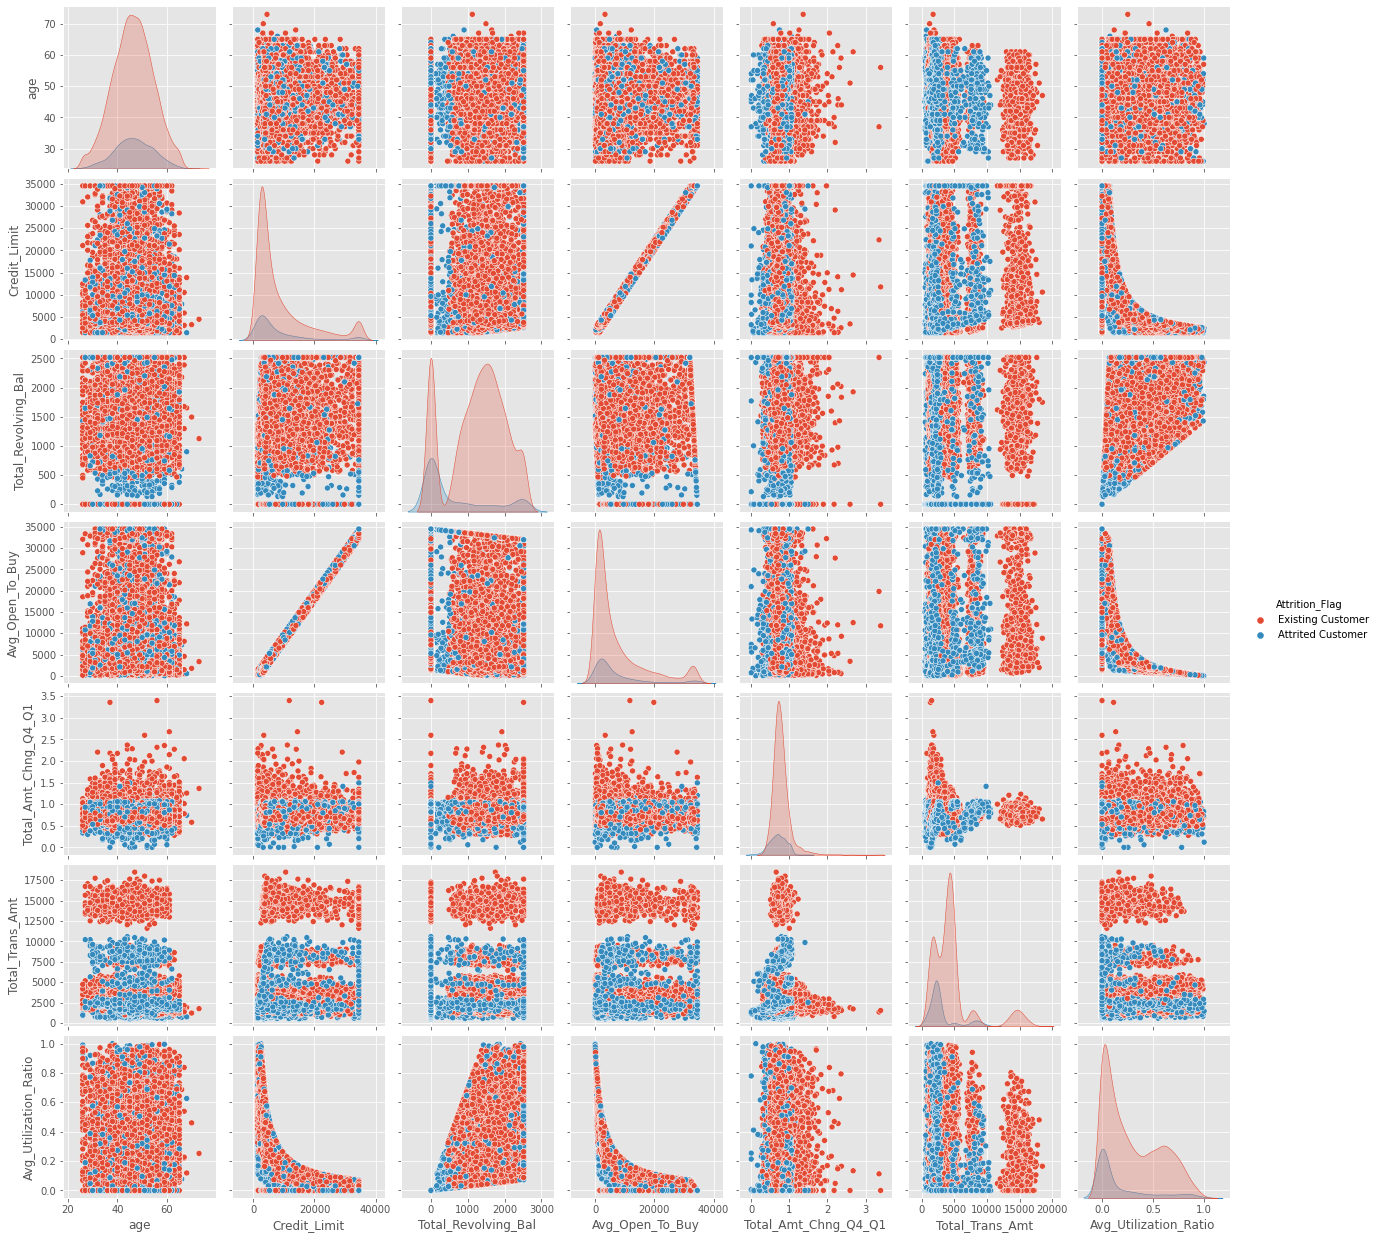

In [17]:
sns.pairplot(df[['Attrition_Flag', 'age', 'Gender' , 'Credit_Limit','Total_Revolving_Bal' ,'Avg_Open_To_Buy' ,'Total_Amt_Chng_Q4_Q1' ,'Total_Trans_Amt' ,'Avg_Utilization_Ratio']], hue = 'Attrition_Flag')

Із розподілів помітно, що наявна сильна різниця в користуванні картками в клієнтів, які в майбутньому перестануть ними користуватися та тими, що досі залишаються клієнтами. Особливо помітна відмінність між  залишком на картах та в середній кількості транзакцій.

Із усіх взаємних розподілів лише age не несе корисної інформації.

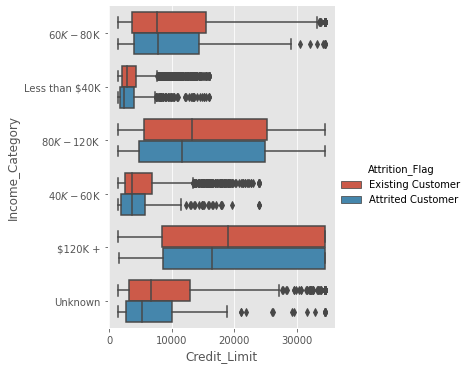

In [20]:
sns.catplot(x = 'Credit_Limit', y = 'Income_Category', kind = 'box', data = df, hue = 'Attrition_Flag')

Як бачимо, кредитний ліміт не є причиною припинення користування банками.

Жінки більше користуються картками ніж чоловіки

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

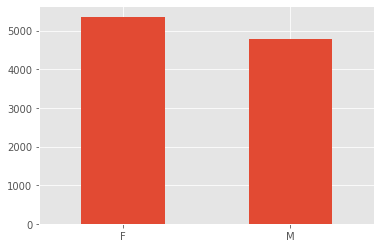

In [66]:
df["Gender"].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Рівень освіти клієнтів банку')

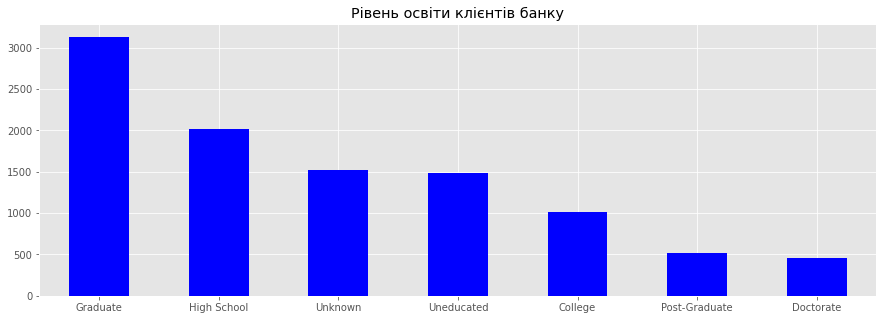

In [67]:
df['Education_Level'].value_counts().plot(kind='bar',colormap='winter',figsize=(15,5))
plt.xticks(rotation = 0)
plt.title('Рівень освіти клієнтів банку')

Найбільшу частку клієнтів складають люди із вищою освітою за ними йдуть люди із середньою освітою

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Divorced')])

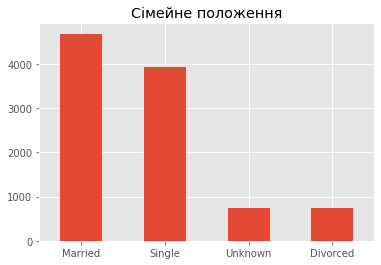

In [68]:
df["Marital_Status"].value_counts().plot(kind='bar')
plt.title('Сімейне положення')
plt.xticks(rotation = 0)

Одружені частіше користуються кредитними картками ніж неодружені.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Less than $40K'),
  Text(1, 0, '$40K - $60K'),
  Text(2, 0, '$80K - $120K'),
  Text(3, 0, '$60K - $80K'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, '$120K +')])

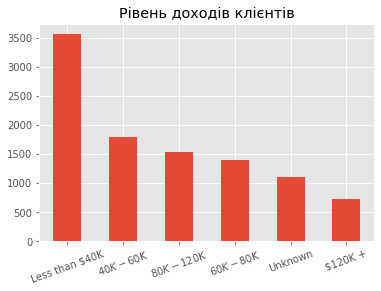

In [69]:
df["Income_Category"].value_counts().plot(kind='bar')
plt.title('Рівень доходів клієнтів')
plt.xticks(rotation = 20)

Як бачимо, що найбільша частина користувачів банку має дохід менше 40 тисяч доларів.
Між іншими категоріями різниця є меншою

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Blue'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Gold'),
  Text(3, 0, 'Platinum')])

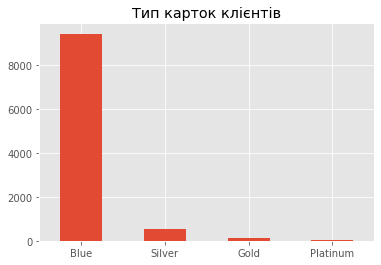

In [72]:
df["Card_Category"].value_counts().plot(kind='bar')
plt.title('Тип карток клієнтів')
plt.xticks(rotation = 0)

Найбільше користуються картками синього кольору

Як відмічалося вище, велика частина ознак мають не числові типи даних, тому їх треба перевести в числовий бінарний або порядковий тип

In [73]:
df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})
df['Gender']=df['Gender'].replace({'M':1,'F':0})
df['Education_Level']=df['Education_Level'].replace({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5, 'Unknown':6})
df['Marital_Status']=df['Marital_Status'].replace({'Single':0, 'Married':1, 'Divorced':2, 'Unknown':3})
df['Income_Category']=df['Income_Category'].replace({'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4, 'Unknown':5})
df['Card_Category']=df['Card_Category'].replace({'Blue': 0, 'Silver':1,'Gold':2,'Platinum':3})
df.drop(['naive_bayes_month_1','naive_bayes_month_2'], axis =1, inplace=True)

In [74]:
df.dtypes

phone                         int64
Attrition_Flag                int64
age                           int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Як бачимо, тепер всі дані є числовими

Побудуємо матрицю кореляцій та розподіли ознак клієнтів

<AxesSubplot:title={'center':'Матриця кореляцій'}>

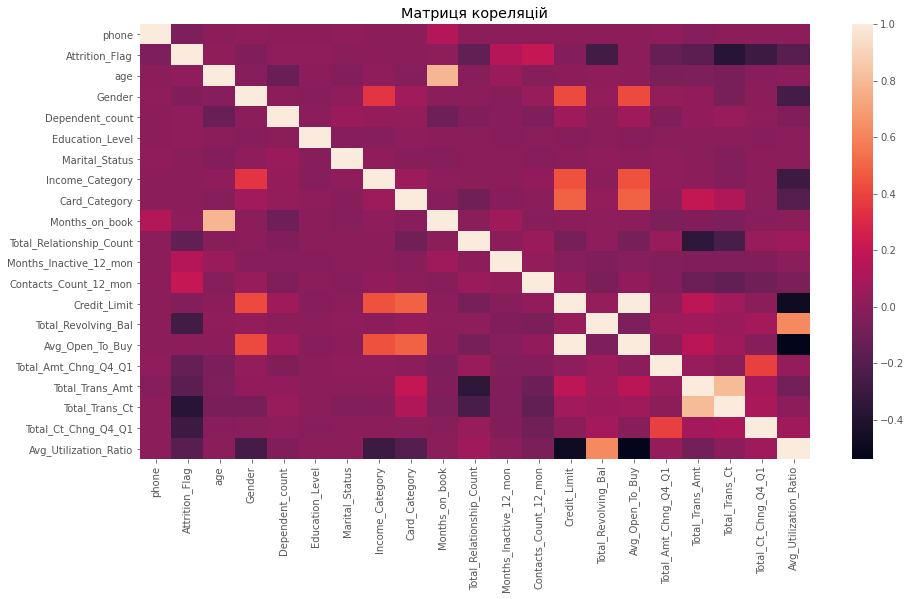

In [75]:
plt.subplots(figsize=(15,8))
plt.title('Матриця кореляцій')
sns.heatmap(df.corr())

array([[<AxesSubplot:title={'center':'phone'}>,
        <AxesSubplot:title={'center':'Attrition_Flag'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>],
       [<AxesSubplot:title={'center':'Education_Level'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Income_Category'}>,
        <AxesSubplot:title={'center':'Card_Category'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>],
       [<AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplo

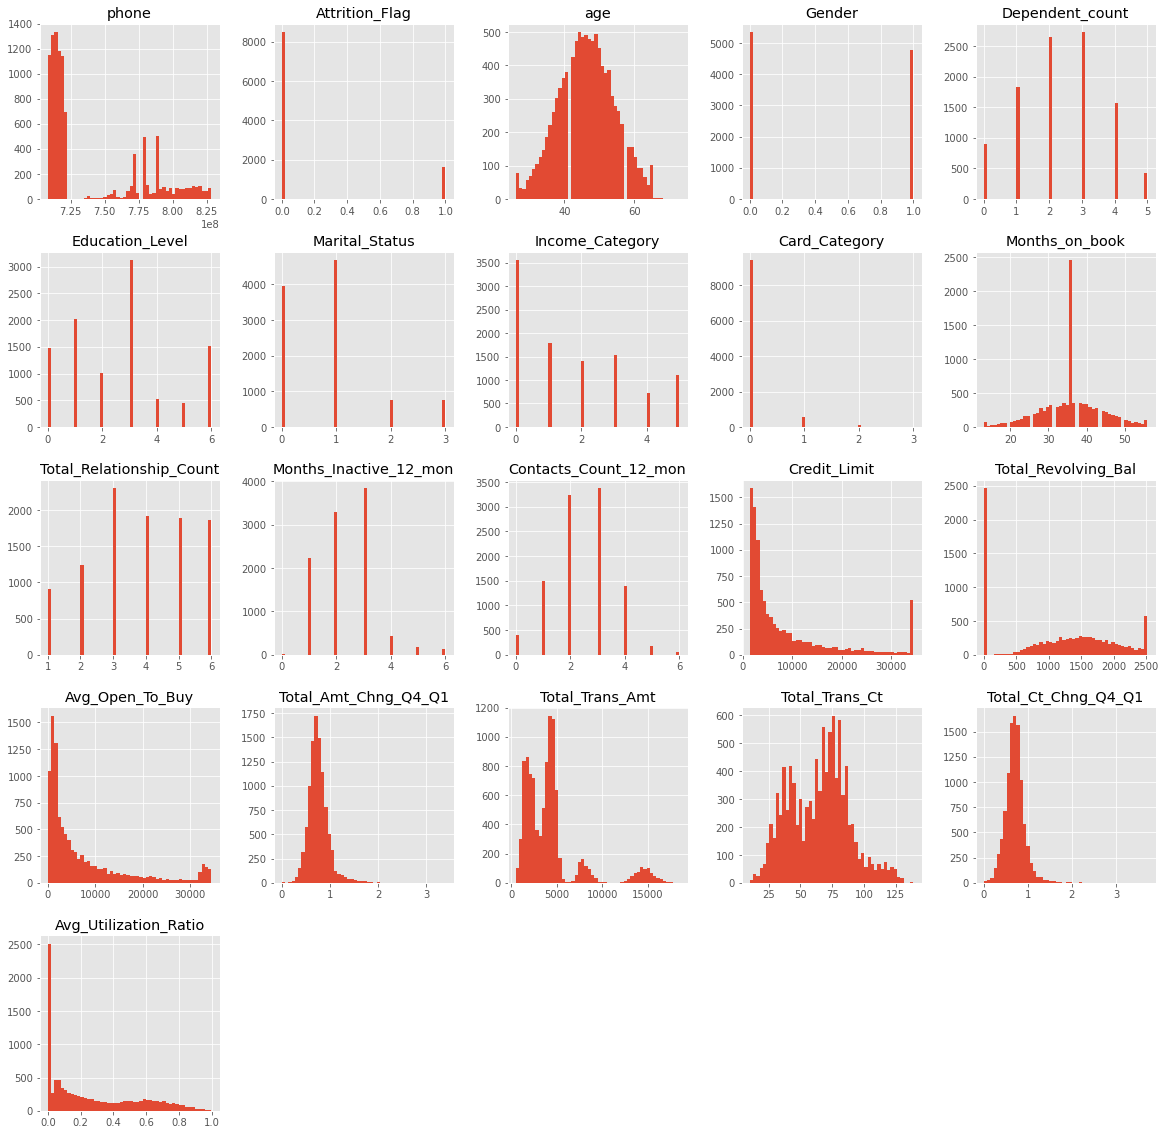

In [76]:
df.hist(bins=50, figsize=(20,20))

Як бачимо, деякі ознаки, такі як кредитний ліміт та тип картки або вік та час користування карткою мають достатньо високу кореляцію, але, ці ознаки краще залишити при побудудові моделі

Варто відмітити, що клієнти, які перестали користуватися банком мають суттєві відмінності в користуванні банку, тому їх можна  класифікувати з високою точністю для того, щоб спробувати змінити їхнє рішення, якщо є така необхідність.

Із розподілів помітно, що припинення користування банком може бути викликане тим, що зникає конкретна причина для цього. Наприклад, припинення обслуговування кредиту. Таке припущення виникає через наявність двох кластерів у розподілах із кількістю транзакцій, яка не спостерігається у звичайних користовуачів. Тому можна казати, що люди, які збираються покинути банк або користуються ним по середньому, або дуже мало.

Ще однією відмінністю є відсітність піку у залишку на рахунках, яка наявна в нинішніх клієнтів. Це свідчить про те, що існують постійні клієнти банку, які використовують його для збереження коштів.

Також потрібно сказати, що кредитний ліміт не є основною причиною припинення користування банком.


На основі аналізу можна назвати типового користувача банку:
Вік - 46 років;
Стать - жінка;
Сімейне положення - заміжня;
Освіта - вища;
Заробітна плата - 70к $;
Тип картки - синя;

# 3. Створення тренувальної та тестової вибірки

In [77]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [78]:
df.columns

Index(['phone', 'Attrition_Flag', 'age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [79]:
X=df[['phone', 'age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y=df['Attrition_Flag']

In [80]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

In [82]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# 4. Побудова моделей

## 4.1 Логістична регресія

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [103]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [104]:
confusion_matrix(y_test,lr_pred)

array([[1501,  207],
       [ 200, 1492]], dtype=int64)

In [105]:
accuracy_score(y_test,lr_pred)

0.8802941176470588

## 4.2 Дерево рішень

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=11)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [108]:
dt_pred=dt.predict(X_test)

In [109]:
print('Точність: ',accuracy_score(y_test,dt_pred))


Точність:  0.941764705882353


In [110]:
confusion_matrix(y_test,dt_pred)

array([[1601,  107],
       [  91, 1601]], dtype=int64)

### 4.2.1 Дерево рішень з обмеженям глибини

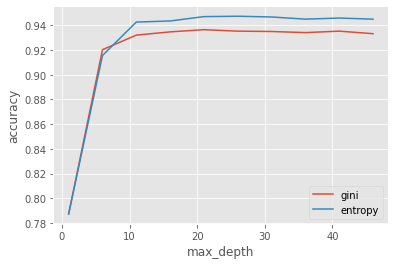

In [111]:
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,50,5):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_gini.append(accuracy_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_entropy.append(accuracy_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Як бачимо, ентропія із глибиною 11 показує хороший результат

## 4.3 Випадковий ліс


In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [114]:
rf_pred=rf.predict(X_test)

In [115]:
confusion_matrix(y_test,rf_pred)

array([[1639,   69],
       [  41, 1651]], dtype=int64)

# 5. Порівняння результатів

<table >
  <tr>
    <th>Алгоритм</th>
    <th>Точність</th> 
  
  </tr>
  <tr>
    <td>Логістична регресія</td>
    <td>88.6 %</td>
  </tr>
    <tr>
    <td>Дерево рішень</td>
    <td>94 %</td>
  </tr>
    <tr>
    <td>Випадковий ліс </td>
    <td>97 %</td>
  </tr>
  
</table>
<br>
<br>